In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

This project is a follow-up data analysis part on the previous one about web scraper on zillow. I used scraping housing data at 27560(zip code) area, which contains 80 houses for sale.

**Agenda**:
* data transformation
* add new features
* correlation analysis
* visualization of house details


**Data transformation**

In [157]:
data = pd.read_csv('individual_houses_in_27560.txt', sep=" \| ", header=None)

/Users/ruihu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [158]:
data.columns = ['id','price','beds','baths','sqft','elementary','middle','high']
data.head()

,id,price,beds,baths,sqft,elementary,middle,high
0,https://www.zillow.com/homedetails/113-Hunters...,"$269,900",3 beds,2 baths,"1,203 sqft",9,6,8
1,https://www.zillow.com/homedetails/107-Gratiot...,"$344,900",4 beds,3 baths,"2,060 sqft",9,5,8
2,https://www.zillow.com/homedetails/204-Governo...,"$400,000",4 beds,3 baths,"2,821 sqft",9,5,8
3,https://www.zillow.com/homedetails/123-Trellin...,"$2,349,000",6 beds,7 baths,"7,676 sqft",8,5,8
4,https://www.zillow.com/homedetails/1713-Legend...,"$369,900",3 beds,2.5 baths,"2,360 sqft",9,6,6


check null value

In [148]:
data[data.isnull().any(axis=1)]

,id,price,beds,baths,sqft,elementary,middle,high
28,https://www.zillow.com/homedetails/401-Courtho...,NaN,-- beds,2 baths,"1,853 sqft",9,5,8
52,https://www.zillow.com/homedetails/210-Leacrof...,NaN,-- beds,4 baths,"3,299 sqft",9,5,8
75,https://www.zillow.com/homedetails/3002-Page-R...,"$275,000",NaN,NaN,NaN,4,3,4


In [159]:
data = data.fillna("-1")

extract numbers for price, beds, baths and sqft

In [160]:
data['price'] = data['price'].apply(lambda x: x[1:])
data['beds'] = data['beds'].apply(lambda x: (x.split()[0]))
data['baths'] = data['baths'].apply(lambda x: (x.split()[0]))
data['sqft'] = data['sqft'].apply(lambda x: x.split()[0])

In [140]:
data.head(5)

,id,price,beds,baths,sqft,elementary,middle,high
0,https://www.zillow.com/homedetails/113-Hunters...,"69,900",3,2,"1,203",9,6,8
1,https://www.zillow.com/homedetails/107-Gratiot...,"44,900",4,3,"2,060",9,5,8
2,https://www.zillow.com/homedetails/204-Governo...,"00,000",4,3,"2,821",9,5,8
3,https://www.zillow.com/homedetails/123-Trellin...,",349,000",6,7,"7,676",8,5,8
4,https://www.zillow.com/homedetails/1713-Legend...,"69,900",3,2.5,"2,360",9,6,6


replace string "--" with "0"

In [161]:
data['beds'] = data['beds'].apply(lambda x: x.replace("--", "0"))
data['baths'] = data['baths'].apply(lambda x: x.replace("--", "0"))
data['sqft'] = data['sqft'].apply(lambda x: x.replace("--", "0"))

change data type at columns: price from string to int

In [162]:
data['price'] = data['price'].apply(lambda x: int(x.replace(",","")))

change data type at columns: beds, baths, sqft from string to float

In [163]:
data['beds'] = data['beds'].apply(lambda x: float(x))
data['baths'] = data['baths'].apply(lambda x: float(x))
data['sqft'] = data['sqft'].apply(lambda x: float(x.replace(",","")))

change data type at columns: elementary, middle, high from numpy int64 to int

In [167]:
data['elementary'] = data['elementary'].apply(lambda x: np.asscalar(np.int16(x)))

In [168]:
data['middle'] = data['middle'].apply(lambda x: np.asscalar(np.int16(x)))
data['high'] = data['high'].apply(lambda x: np.asscalar(np.int16(x)))

transform id column

In [173]:
data['id'] = data['id'].apply(lambda x: x.split('/')[-2].split('_')[0])

After preprocessing dataframe, here is the metadata:
* id(zilloa id): string
* price, beds, baths: float
* elementary, middle, high: int

In [175]:
data.head()

,id,price,beds,baths,sqft,elementary,middle,high
0,6543438,269900,3.0,2.0,1203.0,9,6,8
1,50115340,344900,4.0,3.0,2060.0,9,5,8
2,65330963,400000,4.0,3.0,2821.0,9,5,8
3,50113644,2349000,6.0,7.0,7676.0,8,5,8
4,79883305,369900,3.0,2.5,2360.0,9,6,6


**Add new features**

new feature: price per sqft

In [192]:
data['price/sqft'] = data['price']/data['sqft']
data['price/sqft'] = data['price/sqft'].apply(lambda x: "%.2f" % x)

In [197]:
cols = data.columns.tolist()
cols = ['id','price','sqft','price/sqft','beds','baths','elementary','middle','high', 'sch_score']
data = data[cols]

new feature: weighted score for three level of schools

In [196]:
data['sch_score'] = 0.4*data['elementary'] + 0.4*data['middle'] + 0.2*data['high']

In [198]:
data.head()

,id,price,sqft,price/sqft,beds,baths,elementary,middle,high,sch_score
0,6543438,269900,1203.0,224.36,3.0,2.0,9,6,8,7.6
1,50115340,344900,2060.0,167.43,4.0,3.0,9,5,8,7.2
2,65330963,400000,2821.0,141.79,4.0,3.0,9,5,8,7.2
3,50113644,2349000,7676.0,306.02,6.0,7.0,8,5,8,6.8
4,79883305,369900,2360.0,156.74,3.0,2.5,9,6,6,7.2


**Correlation analysis**

visualize correlation between price and sqft

/Users/ruihu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ruihu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


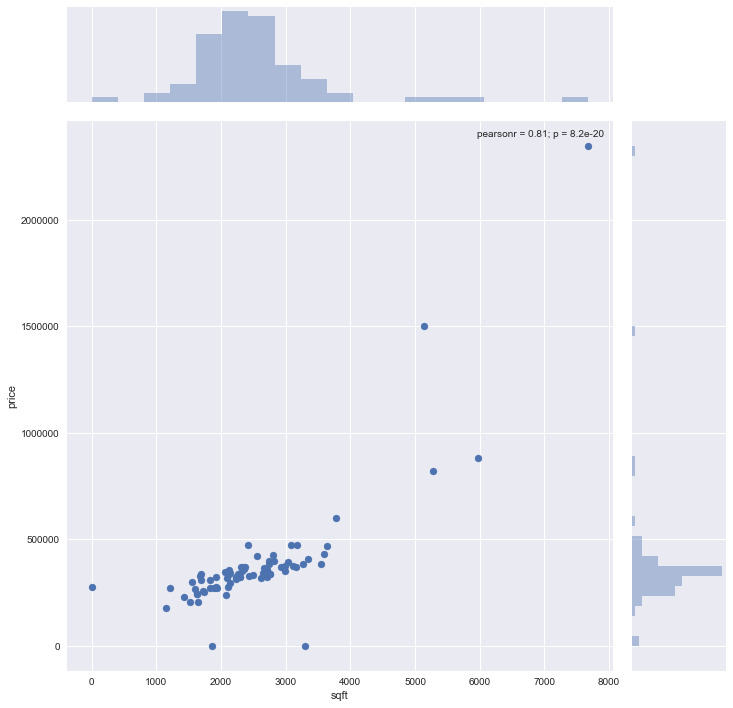

In [190]:
sns.jointplot(x='sqft', y='price', data=data, size=(10))
plt.show()

It shows that there are several outliers with high price and large sqft.

The pearson correlation between price and sqft is high, but p-value is low which means the correlation coefficient is significant.

**Visualization of house details**

visualize the amount of beds and baths for houses in this area

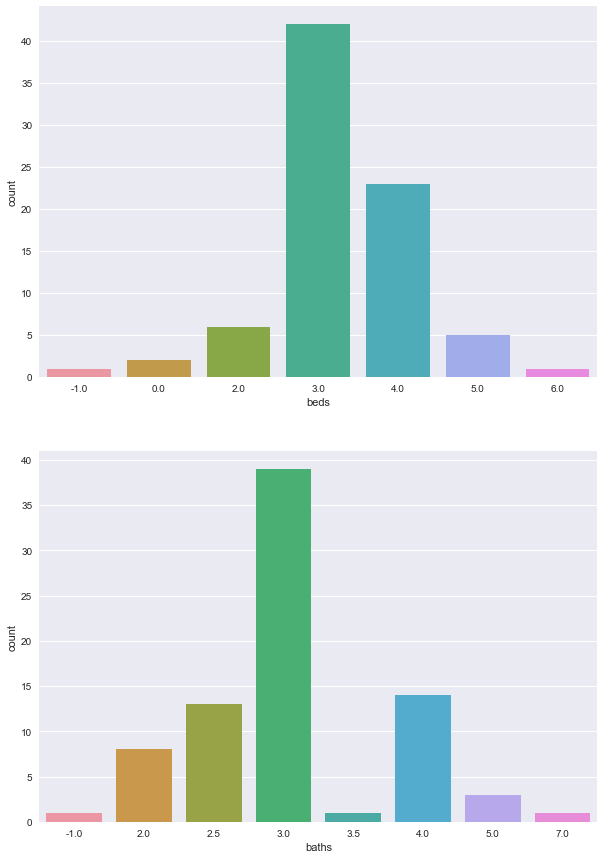

In [201]:
fig, ax = plt.subplots(2,1,figsize=(10,15))
sns.countplot(data['beds'], ax=ax[0])
sns.countplot(data['baths'],ax=ax[1])
plt.show()